## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
heart = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv')

In [3]:
heart.shape

(4238, 16)

In [4]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [5]:
# answer below:
heart.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df = heart.dropna()
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
df.TenYearCHD.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

Then, we split the data into train and test with 20% of the data in the test subset.

In [8]:
# answer below:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We will then scale the data using the standard scaler. Do this in the cell below.

In [9]:
# answer below:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


Generate a polynomial SVC model and a RBF SVC model. Compare the performance, and the runtime, for the two models.

In [10]:
# answer below:
from sklearn.svm import SVC
from datetime import datetime

start_time = datetime.now()
svc_poly = SVC(kernel='poly', C=100)

svc_poly.fit(X_train_scaled, y_train)
end_time = datetime.now()

print("RBF Train score: ",svc_poly.score(X_train_scaled, y_train))
print("RBF Test score: ",svc_poly.score(X_test_scaled, y_test))
print('Duration: {}'.format(end_time - start_time))

RBF Train score:  0.8956908344733242
RBF Test score:  0.825136612021858
Duration: 0:00:05.947113


In [11]:
start_time = datetime.now()
svc_rbf = SVC(kernel='rbf', C=100)

svc_rbf.fit(X_train_scaled, y_train)
end_time = datetime.now()

print("RBF Train score: ",svc_rbf.score(X_train_scaled, y_train))
print("RBF Test score: ",svc_rbf.score(X_test_scaled, y_test))
print('Duration: {}'.format(end_time - start_time))

RBF Train score:  0.9459644322845417
RBF Test score:  0.8128415300546448
Duration: 0:00:00.928586


Which model overfits more? How would you improve the overfitting?

When C=100 the RBF model seems to overfits a lot more, and is less accurate on the test set. But the polynomial model takes almost 5 times as long to run. So it seems like there is a trade off in model runtime and model accuracy at higher levels of C. 


In [12]:
start_time = datetime.now()
svc_poly = SVC(kernel='poly', C=10)

svc_poly.fit(X_train_scaled, y_train)
end_time = datetime.now()

print("RBF Train score: ",svc_poly.score(X_train_scaled, y_train))
print("RBF Test score: ",svc_poly.score(X_test_scaled, y_test))
print('Duration: {}'.format(end_time - start_time))

RBF Train score:  0.8874829001367989
RBF Test score:  0.8278688524590164
Duration: 0:00:00.869483


In [13]:
start_time = datetime.now()
svc_rbf = SVC(kernel='rbf', C=10)

svc_rbf.fit(X_train_scaled, y_train)
end_time = datetime.now()

print("RBF Train score: ",svc_rbf.score(X_train_scaled, y_train))
print("RBF Test score: ",svc_rbf.score(X_test_scaled, y_test))
print('Duration: {}'.format(end_time - start_time))

RBF Train score:  0.8950068399452804
RBF Test score:  0.8306010928961749
Duration: 0:00:00.419839


When C=10 the RBF model seems to overfit a bit more, and is also slightly more accurate on the test set. The polynomial model seems slighlty less
 accurate on test data and its takes longer to run the model. 

In [14]:
start_time = datetime.now()
svc_poly = SVC(kernel='poly', C=1)

svc_poly.fit(X_train_scaled, y_train)
end_time = datetime.now()

print("RBF Train score: ",svc_poly.score(X_train_scaled, y_train))
print("RBF Test score: ",svc_poly.score(X_test_scaled, y_test))
print('Duration: {}'.format(end_time - start_time))

RBF Train score:  0.8741450068399452
RBF Test score:  0.8319672131147541
Duration: 0:00:00.252677


In [15]:
start_time = datetime.now()
svc_rbf = SVC(kernel='rbf', C=1)

svc_rbf.fit(X_train_scaled, y_train)
end_time = datetime.now()

print("RBF Train score: ",svc_rbf.score(X_train_scaled, y_train))
print("RBF Test score: ",svc_rbf.score(X_test_scaled, y_test))
print('Duration: {}'.format(end_time - start_time))

RBF Train score:  0.8635430916552668
RBF Test score:  0.825136612021858
Duration: 0:00:00.326579


When C=1 the RBF model is slightly less accurate on test data, but overfits less. The polynomial model seems to overfit more, but it is also slightly more accurate on the test set.

Look at a classification report and confusion matrix. How does the class balance affect your results?

In [16]:
# answer below:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


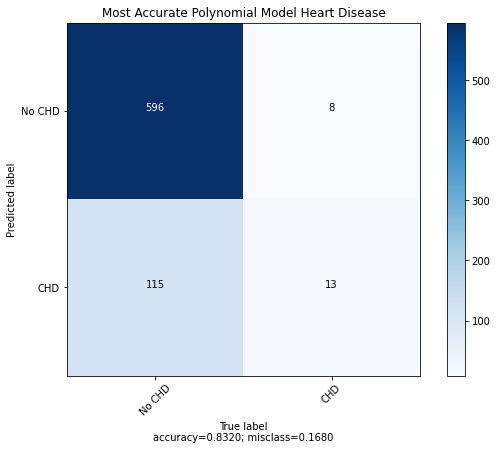

In [25]:
from sklearn.metrics import  classification_report, confusion_matrix
y_test_pred = svc_poly.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['No CHD','CHD'],title = 'Most Accurate Polynomial Model Heart Disease',normalize=False)

In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       604
           1       0.62      0.10      0.17       128

    accuracy                           0.83       732
   macro avg       0.73      0.54      0.54       732
weighted avg       0.80      0.83      0.78       732



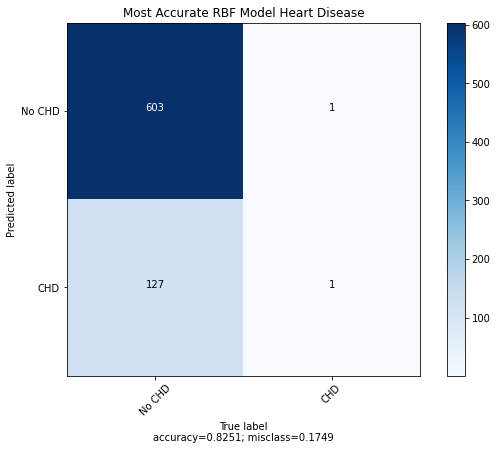

In [27]:
y_test_pred = svc_rbf.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['No CHD','CHD'],title = 'Most Accurate RBF Model Heart Disease',normalize=False)

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       604
           1       0.50      0.01      0.02       128

    accuracy                           0.83       732
   macro avg       0.66      0.50      0.46       732
weighted avg       0.77      0.83      0.75       732



Class imbalance is skewing recall in both models to the dominate class. We see 99-100% recall in the dominant class (No Coronary Heart Disease). Recall is 10% and 1% in both modes for the minority class (Coronary Heart Disease). Precision for CHD was a lot better in the polynomial model (0.62 vs 0.50), but that is expected because it was the most accurately scored model. Both models made very few predictions in the minority class. In fact the RBG model only made 2 predictions. 